Max value on input data from receiver №301: 46
Max value index: 2569

Min aic value: 451.9004641069307
Min aic index: 2514
Min aic index on window: 55
Values: [ 15  14  17  13  18  14  19  13  15  14  15  15  16  13  13  10  14  14
  17  14  14  15  15  12  17  11  14  11  15  14  18  13  13  14  18  14
  18  11  17  14  13  11  15  15  16  13  15  12  16  11  19  13  15  13
  19  18  24  15   9  -3  -5  -5   7  31  46  44  30   1 -10 -19  -2  21
  31  36  31  18  11   3   3   3  10  14  14  13  17  15  20  20  21  19
  15   6   4   4  11  18  24  22  25  14  14   5   2  -2   8  13  27  28
  29  18  11   0   2   6  14  24  27  21  17   6   9   6  11  16  16  14
  13   8]

pointNum:49, aicmin:284.96210349978026, varLeft:0.1449396084964576, varRight:129.89151873767256


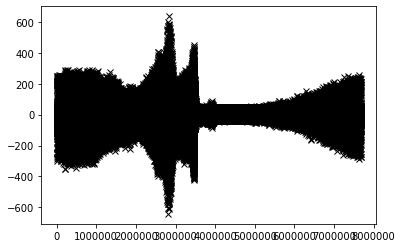

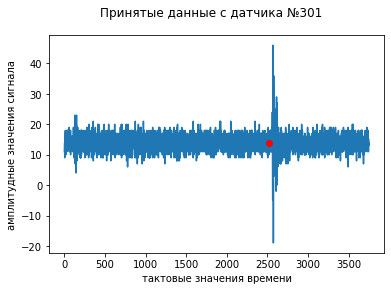

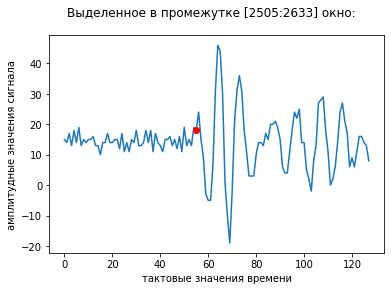

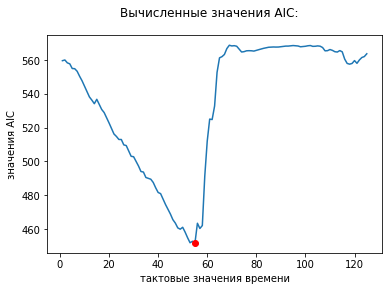

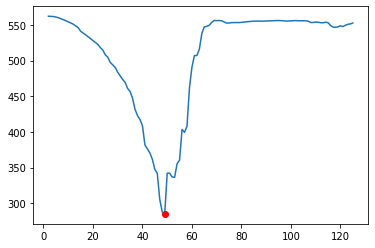

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as mat

elements_num = 2048
time_points_num = 3750

fileName1 = 'D:\\data_phantom.bin'
outputFilename = 'each_8.txt'
n_emitter = 900
n_receiver = 301

# time window is equal to half_time_window * 2
half_time_window = 64

offset = int(elements_num * time_points_num * (n_emitter - 1))
with open(fileName1, mode='rb') as file:
    file.seek(offset, 0)
    file_content = file.read(time_points_num * elements_num * 2)
    test_data = np.frombuffer(file_content, dtype=np.int16)
    plt.plot(test_data, 'kx')
    data_reshaped = np.reshape(test_data, (time_points_num, elements_num))
    data = np.transpose(data_reshaped)
    plt.plot(data[n_receiver], 'kx')
    thresholds = np.amax(data[n_receiver]) #on data: min=-630 max=582
    print('Max value on input data from receiver №' + str(n_receiver) +':', thresholds)
    for i in range(time_points_num):
        if data[n_receiver,i] >= thresholds:
            index_on_max = i
            break
    print('Max value index:', index_on_max)
    values = data[n_receiver, index_on_max-half_time_window : index_on_max+half_time_window]
    print('')
    
    imin = 0
    imax = half_time_window * 2 - 1
    
#-------------------------------------------------------------------------------------------------------------------------

    aic_values = np.empty(half_time_window * 2)
    aic_values[:] = np.nan
    vars = np.empty(half_time_window * 2)
    vars[:] = np.nan
    log1 = 0
    log2 = 0
    for k in range(imin+1, imax-1):
        k1 = (k + 1)
        vals1 = values[imin:k+1]
        k2 = (imax - imin - (k - 1))  
        vals2 = values[k+1:imax+1]
#        if k < imax/2:
#         print('k=' + str(k) + ':')
#         print(vals1)
#         print("VarLeft: ", np.var(vals1))
#        if k >= imax/2:
#         print(vals2)
#         print("VarRight: ", np.var(vals2))
        log1 = k1 * np.log(np.var(vals1, ddof=1)) 
        log2 = k2 * np.log(np.var(vals2, ddof=1))
        aic_values[k] = log1 + log2
#         print('Logs:', str(log1), str(log2))
#         print('AIC:', aic_values[k])
#         print('')

#   print(aic_values)
#   print('Max on vars:', np.nanmax(vars))
    aic_min = np.nanmin(aic_values[:])
    aic_index_min_on_values = (np.where(aic_values == np.nanmin(aic_values)))[0][0]
    aic_index_min_on_data = index_on_max-aic_index_min_on_values
    print('Min aic value:', aic_min)
    print('Min aic index:', aic_index_min_on_data)
    print('Min aic index on window:', aic_index_min_on_values)
    
    fig, axs = plt.subplots()
    fig1, axs1 = plt.subplots()
    fig2, axs2 = plt.subplots()
    fig.suptitle('Принятые данные с датчика №' + str(n_receiver))
    fig1.suptitle('Выделенное в промежутке [' + str(index_on_max-half_time_window) + ':' + str(index_on_max+half_time_window) + '] окно:')
    fig2.suptitle('Вычисленные значения AIC:')
    axs.plot(data[n_receiver])
    axs.plot(aic_index_min_on_data, data[n_receiver][aic_index_min_on_data], color='red', marker='o')
    axs.set_xlabel('тактовые значения времени')
    axs.set_ylabel('амплитудные значения сигнала')
    axs1.plot(values)
    axs1.plot(aic_index_min_on_values, values[aic_index_min_on_values], color='red', marker='o')
    axs1.set_xlabel('тактовые значения времени')
    axs1.set_ylabel('амплитудные значения сигнала')
    axs2.plot(aic_values)
    axs2.plot(aic_index_min_on_values, aic_values[aic_index_min_on_values], color='red', marker='o')
    axs2.set_xlabel('тактовые значения времени')
    axs2.set_ylabel('значения AIC')
    fig.savefig('books_read.png')
    fig1.savefig('1books_read.png')
    fig2.savefig('2books_read.png')

#-------------------------------------------------------------------------------------------------------------------------

    #values1 = np.array(values, dtype=np.unicode)
    #values1 = values.astype(np.int16).view('c')
    #values2 = values.encode('utf8')
    
    #print(values2)
# with open('D:\\data_phantom_o.txt', mode='w', encoding='UTF-16-LE') as o:
#     values1.tofile(o)
    
# with open('D:\\data_phantom_o.bin', mode='w') as o:
#     data[n_receiver, index_on_max-half_time_window : index_on_max+half_time_window].tofile(o)

# with open('D:\\data_phantom_o.bin', mode='rb') as file:
#     file.seek(0, 0)
#     file_content = file.read(time_points_num * 2)
#     test_data = np.frombuffer(file_content, dtype=np.int16)
#     data1 = np.reshape(test_data, 64)
#     plt.plot(data1, 'kx')

#-------------------------------------------------------------------------------------------------------------------------

    values1 = np.empty(half_time_window * 2)
    values1[:] = np.float(np.nan)
    for i in range(len(values)):
        values1[i] = np.float(values[i])
    print('Values:', values)
    
    imin = 0
    imax = half_time_window * 2
    runningSum = np.float(0)
    runningSumSq = np.float(0)
    sums = np.empty(half_time_window * 2)
    sums[:] = np.float(np.nan)
    sumsqs = np. empty(half_time_window * 2)
    sumsqs[:] = np.float(np.float(np.nan))
    sumRight = np.float(0)
    sumLeft = np.float(0)
    sumRightSq = np.float(0)
    sumLeftSq = np.float(0)
    varLeft = np.float(0)
    varRight = np.float(0)
    aic = np.float(0)
    aic_arr = np.empty(half_time_window * 2)
    aic_arr[:] = np.nan
    logLeft = np.float(0)
    logRight = np.float(0)
    pointNum = np.float(0)
    varRightPrint = np.float(0)
    varLeftPrint = np.float(0)
    aicmin = np.float(1e+10)
    
    for i in range(imin, imax):
        runningSum += values1[i]
        runningSumSq += abs(values1[i]) * abs(values1[i])
        sums[i] = runningSum
        sumsqs[i] = runningSumSq
#     print('runningSum:', runningSum)
#     print('runningSumSq:', runningSumSq)
#     print('sums:', sums)
#     print('sumsqs:', sumsqs)
#     print('')
    
    for i in range(imin+2, imax-2):
        sumLeft = sums[i]
        sumLeftsq = sumsqs[i]
        varLeft = (sumLeftsq / i) - (sumLeft * sumLeft) / (i * i)
        sumRight = sums[(imax - 1)] - sums[i]
        sumRightsq = sumsqs[(imax - 1)] - sumsqs[i]
        varRight = sumRightsq / (imax - 1 - i) - (sumRight * sumRight) / ((imax - 1 - i) * (imax - 1 - i))
        if varLeft != 0:
            logLeft = mat.log(abs(varLeft))
        else:
            logLeft = 0
        if varRight != 0:
            logRight = mat.log(abs(varRight))
        else:
            logRight = 0
        aic =  i * logLeft + ((imax - 1) - i) * logRight
        aic_arr[i] = aic
        forprint1 = '[' + str(i) + ']' + ' LeftSum:' + str(sumLeft) + ' LeftSq:' + str(sumLeftsq)
        forprint2 = ' RightSum:' + str(sumRight) + ' RightSq:' + str(sumRightsq)
        forprint3 = ' VarLeft:' + str(varLeft) + ' VarRight:' + str(varRight)
        forprint4 = ' LogLeft:' + str(logLeft) + ' LogRight:' + str(logRight) + ' AIC:' + str(aic)
#         print(forprint1 + forprint2 + forprint3 + forprint4)
        if (aic < aicmin):
            aicmin = aic
            pointNum = i
            varRightPrint = varRight
            varLeftPrint = varLeft
    fig3, axs3 = plt.subplots()
    axs3.plot(aic_arr)
    axs3.plot(pointNum, aic_arr[pointNum], color='red', marker='o')
    fig3.savefig('3books_read.png')
            
    print('')
    print('pointNum:' + str(pointNum) + ', aicmin:' + str(aicmin) + ', varLeft:' + str(varLeftPrint) + ', varRight:' + str(varRightPrint))
    